In [253]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [254]:
import pandas as pd
import re
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

In [255]:
 df_pol = pd.read_csv('/content/drive/MyDrive/BOK_금리예측_비공개/data/polarity_score_final (1).csv')
 df_min = pd.read_csv('/content/drive/MyDrive/BOK_금리예측/minutes_dp_sentence_split.csv')

In [256]:
df_baserate = pd.read_csv('/content/drive/MyDrive/BOK_금리예측_비공개/data/baserate.csv')

In [257]:
df_baserate

,Unnamed: 0,date,RATE,RATE_30days,change
0,30,2000-03-11,5.00,5.0,0
1,31,2000-03-12,5.00,5.0,0
2,32,2000-03-13,5.00,5.0,0
3,33,2000-03-14,5.00,5.0,0
4,34,2000-03-15,5.00,5.0,0
...,...,...,...,...,...
8289,8319,2022-11-20,3.00,3.0,0
8290,8320,2022-11-21,3.00,3.0,0
8291,8321,2022-11-22,3.00,3.0,0
8292,8322,2022-11-23,3.00,3.0,0


In [258]:
df_pol

,index,hawkish,dovish,cnt,prob_hawkish,prob_dovish,polarity_score
0,인플레이션/NNG;경계/NNG,24,9,33,0.000335,0.000126,2.666667
1,원화/NNG;하락/NNG,29,42,71,0.000405,0.000587,0.690476
2,금리/NNG;인하/NNG;기대/NNG;꺾/VV,5,11,16,0.000070,0.000154,0.454545
3,하락/NNG;과도/NNG,11,8,19,0.000154,0.000112,1.375000
4,지수/NNG;밀리/VV,16,11,27,0.000223,0.000154,1.454545
...,...,...,...,...,...,...,...
1324,금리/NNG;인상/NNG;가능성/NNG;크/VV,54,34,88,0.000754,0.000475,1.588235
1325,순이익/NNG;늘/VV,33,22,55,0.000461,0.000307,1.500000
1326,고용/NNG;개선/NNG,13,17,30,0.000182,0.000237,0.764706
1327,단기/NNG;금리/NNG;마이너스/NNG,12,20,32,0.000168,0.000279,0.600000


In [259]:
df_min

,dates,sentences,ngram_sentence
0,2022-10-27,이에 대해 관련부서에서는 현 상황에서 금리인상 기조를 유지하는 것에는 변함이 없어야...,"['유동성/NNG;위축/NNG', '한시적/VAX;완화/NNG', '금리/NNG;인..."
1,2022-10-27,일부 위원은 회사채 스프레드spread가 상승하면서 크레딧credit 이슈가 나타날...,['회사채/NNG;스프레드/NNG;상승/NNG']
2,2022-10-27,또한 현재로서는 은행의 건전성 수준 등을 고려할 때 시장기능의 일부 위축에도 불구...,['고유동성/NNG;자산/NNG;확보/NNG']
3,2022-10-27,일부 위원은 현재 고물가에 대응하여 금리를 올리는 상황에서 경기와 물가간상충관계가 ...,['금리/NNG;오르/VV']
4,2022-10-27,"일부 위원은 현 경제상황에서 한국은행의 유동성 공급 필요성은 충분해 보이나, 긴축적...",['ecb/NNG;금리/NNG;인상/NNG']
...,...,...,...
30260,2008-02-13,신용등급이 높은 기업 위주로 대출이 취급되면서 상승폭이 일 금리 상승폭을CD상당폭 ...,"['악화/NNG;경기/NNG;침체/NNG;우려/NNG', '주택담보대출/NNG;금리..."
30261,2008-02-13,"우 유동성 확보 차익실현 등을 위해 현물 순매도를 큰 폭으로 늘린 데다 선물도 순,...",['유동성/NNG;확보/NNG']
30262,2008-02-13,소기업대출을 중심으로 민간신용의 증가세가 크게 확대된 데다 정부부문에서도 공공자금관...,"['민간/NNG;신용/NNG;증가/NNG', '금리/NNG;매력/NNG;높/VA']"
30263,2008-02-13,소기업대출은 전년말 부채비율 관리를 위해서 일시 상환되었던 대출의 재차입 수요에 부...,['부도율/NNG;하락/NNG']


In [260]:
pol_dict = {}
for idx in df_pol.index :
    pol_dict[df_pol.loc[idx, 'index']] = df_pol.loc[idx, 'polarity_score']
pol_dict

{'인플레이션/NNG;경계/NNG': 2.666666666666667,
 '원화/NNG;하락/NNG': 0.6904761904761905,
 '금리/NNG;인하/NNG;기대/NNG;꺾/VV': 0.4545454545454546,
 '하락/NNG;과도/NNG': 1.3749999999999998,
 '지수/NNG;밀리/VV': 1.4545454545454548,
 '통화/NNG;긴축/NNG': 2.783783783783784,
 '이자/NNG;납입/NNG;유예/NNG': 0.3333333333333333,
 '금리/NNG;인하/NNG': 0.4876698540513337,
 '물가/NNG;급등/NNG': 2.9375,
 '지수/NNG;부담/NNG': 1.8888888888888888,
 '금리/NNG;변동/NNG;위험/NNG': 0.7096774193548387,
 '물가/NNG;지표/NNG;호조/NNG': 3.0,
 '위기/NNG;경고/NNG': 1.8571428571428568,
 '경제/NNG;둔화/NNG;우려/NNG': 1.3076923076923077,
 '심리/NNG;개선/NNG': 1.3333333333333333,
 '채권/NNG;금리/NNG;인상/NNG': 0.7142857142857143,
 '경제/NNG;성장률/NNG;그치/VV': 0.3823529411764705,
 '수익구조/NNG;개선/NNG': 2.0,
 'fed/NNG;금리/NNG;인상/NNG;서둘/VV;않/VX': 0.1875,
 '위험/NNG;없/VA': 1.7499999999999998,
 '하락/NNG;최대/NNG': 3.333333333333333,
 '생산자/NNG;물가/NNG;상승/NNG': 2.285714285714286,
 '높/VA;상승/NNG': 1.8888888888888888,
 '국채선물/NNG;상승/NNG;축소/NNG': 0.5454545454545455,
 '중소기업/NNG;금융/NNG;비용/NNG;부담/NNG': 2.142857142857143,
 '금

In [262]:
df_min

,dates,sentences,ngram_sentence
0,2022-10-27,이에 대해 관련부서에서는 현 상황에서 금리인상 기조를 유지하는 것에는 변함이 없어야...,"['유동성/NNG;위축/NNG', '한시적/VAX;완화/NNG', '금리/NNG;인..."
1,2022-10-27,일부 위원은 회사채 스프레드spread가 상승하면서 크레딧credit 이슈가 나타날...,['회사채/NNG;스프레드/NNG;상승/NNG']
2,2022-10-27,또한 현재로서는 은행의 건전성 수준 등을 고려할 때 시장기능의 일부 위축에도 불구...,['고유동성/NNG;자산/NNG;확보/NNG']
3,2022-10-27,일부 위원은 현재 고물가에 대응하여 금리를 올리는 상황에서 경기와 물가간상충관계가 ...,['금리/NNG;오르/VV']
4,2022-10-27,"일부 위원은 현 경제상황에서 한국은행의 유동성 공급 필요성은 충분해 보이나, 긴축적...",['ecb/NNG;금리/NNG;인상/NNG']
...,...,...,...
30260,2008-02-13,신용등급이 높은 기업 위주로 대출이 취급되면서 상승폭이 일 금리 상승폭을CD상당폭 ...,"['악화/NNG;경기/NNG;침체/NNG;우려/NNG', '주택담보대출/NNG;금리..."
30261,2008-02-13,"우 유동성 확보 차익실현 등을 위해 현물 순매도를 큰 폭으로 늘린 데다 선물도 순,...",['유동성/NNG;확보/NNG']
30262,2008-02-13,소기업대출을 중심으로 민간신용의 증가세가 크게 확대된 데다 정부부문에서도 공공자금관...,"['민간/NNG;신용/NNG;증가/NNG', '금리/NNG;매력/NNG;높/VA']"
30263,2008-02-13,소기업대출은 전년말 부채비율 관리를 위해서 일시 상환되었던 대출의 재차입 수요에 부...,['부도율/NNG;하락/NNG']


In [263]:
for idx in tqdm(df_min.index) :
    result = []
    for ngm in re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣,.\/; ]', '', df_min.loc[idx, 'ngram_sentence']).split(',') :
        temp = [ngm_word.strip() for ngm_word in ngm.split(';')]
        result.append(';'.join(temp))
    hawkish_sum = 0
    dovish_sum = 0
    for res in result:
        try :
            temp_score = float(pol_dict[res])
            if temp_score < 1 :
                dovish_sum += 1
            else :
                hawkish_sum += 1
        except:
            continue
    if ((hawkish_sum + dovish_sum) != 0) and str((hawkish_sum + dovish_sum)) != 'nan':
        df_min.loc[idx, 'tone'] = (hawkish_sum - dovish_sum) /  (hawkish_sum + dovish_sum)
    else :
        df_min.loc[idx, 'tone'] = 0
df_min = df_min[['dates', 'tone']]
df_min

  0%|          | 0/30265 [00:00<?, ?it/s]

,dates,tone
0,2022-10-27,1.0
1,2022-10-27,0.0
2,2022-10-27,0.0
3,2022-10-27,1.0
4,2022-10-27,1.0
...,...,...
30260,2008-02-13,0.0
30261,2008-02-13,0.0
30262,2008-02-13,0.0
30263,2008-02-13,0.0


In [ ]:
def doc_tone(sentence_tone_series):
    hawkish_count = 0
    dovish_count = 0
    
    hawkish_count = sentence_tone_series[sentence_tone_series > 0].count()
    dovish_count = sentence_tone_series[sentence_tone_series < 0].count()
    
    if (hawkish_count + dovish_count) == 0:
        return np.nan
    
    doc_tone = (hawkish_count - dovish_count) / (hawkish_count + dovish_count)
    
    return doc_tone
df_min = df_min.groupby('dates')['tone'].apply(doc_tone)
df_min = df_min.reset_index()
df_min['tone'] = df_min['tone'].fillna(0)
df_min

,dates,tone
0,2008-02-13,-0.545455
1,2008-03-07,-0.619048
2,2008-03-20,0.000000
3,2008-04-10,-0.200000
4,2008-05-08,-0.307692
...,...,...
275,2022-08-25,0.579832
276,2022-09-08,0.714286
277,2022-09-22,0.200000
278,2022-10-12,0.565217


In [ ]:
df_baserate

,Unnamed: 0,date,RATE,RATE_30days,change
0,30,2000-03-11,5.00,5.0,0
1,31,2000-03-12,5.00,5.0,0
2,32,2000-03-13,5.00,5.0,0
3,33,2000-03-14,5.00,5.0,0
4,34,2000-03-15,5.00,5.0,0
...,...,...,...,...,...
8289,8319,2022-11-20,3.00,3.0,0
8290,8320,2022-11-21,3.00,3.0,0
8291,8321,2022-11-22,3.00,3.0,0
8292,8322,2022-11-23,3.00,3.0,0


In [ ]:
bar_dict = {}
for idx in df_baserate.index :
    date_temp = df_baserate.loc[idx, 'date']
    date_rate = df_baserate.loc[idx, 'RATE']
    date_change = df_baserate.loc[idx, 'change']
    bar_dict[date_temp] = {'rate' : date_rate, 'change' : date_change}
bar_dict

{'2000-03-11': {'rate': 5.0, 'change': 0},
 '2000-03-12': {'rate': 5.0, 'change': 0},
 '2000-03-13': {'rate': 5.0, 'change': 0},
 '2000-03-14': {'rate': 5.0, 'change': 0},
 '2000-03-15': {'rate': 5.0, 'change': 0},
 '2000-03-16': {'rate': 5.0, 'change': 0},
 '2000-03-17': {'rate': 5.0, 'change': 0},
 '2000-03-18': {'rate': 5.0, 'change': 0},
 '2000-03-19': {'rate': 5.0, 'change': 0},
 '2000-03-20': {'rate': 5.0, 'change': 0},
 '2000-03-21': {'rate': 5.0, 'change': 0},
 '2000-03-22': {'rate': 5.0, 'change': 0},
 '2000-03-23': {'rate': 5.0, 'change': 0},
 '2000-03-24': {'rate': 5.0, 'change': 0},
 '2000-03-25': {'rate': 5.0, 'change': 0},
 '2000-03-26': {'rate': 5.0, 'change': 0},
 '2000-03-27': {'rate': 5.0, 'change': 0},
 '2000-03-28': {'rate': 5.0, 'change': 0},
 '2000-03-29': {'rate': 5.0, 'change': 0},
 '2000-03-30': {'rate': 5.0, 'change': 0},
 '2000-03-31': {'rate': 5.0, 'change': 0},
 '2000-04-01': {'rate': 5.0, 'change': 0},
 '2000-04-02': {'rate': 5.0, 'change': 0},
 '2000-04-0

In [ ]:
df_min = df_min.reset_index(drop=True)
df_min

,dates,tone
0,2008-02-13,-0.545455
1,2008-03-07,-0.619048
2,2008-03-20,0.000000
3,2008-04-10,-0.200000
4,2008-05-08,-0.307692
...,...,...
275,2022-08-25,0.579832
276,2022-09-08,0.714286
277,2022-09-22,0.200000
278,2022-10-12,0.565217


In [ ]:
df_min['base_rate'] = df_min['dates'].apply(lambda x : bar_dict[x]['rate'])
df_min['base_change'] = df_min['dates'].apply(lambda x : bar_dict[x]['change'])
df_min

,dates,tone,base_rate,base_change
0,2008-02-13,-0.545455,5.0,0
1,2008-03-07,-0.619048,5.0,0
2,2008-03-20,0.000000,5.0,0
3,2008-04-10,-0.200000,5.0,0
4,2008-05-08,-0.307692,5.0,0
...,...,...,...,...
275,2022-08-25,0.579832,2.5,1
276,2022-09-08,0.714286,2.5,1
277,2022-09-22,0.200000,2.5,1
278,2022-10-12,0.565217,3.0,1


In [ ]:
df_min.corr(method='pearson')

,tone,base_rate,base_change
tone,1.000000,0.019501,0.383718
base_rate,0.019501,1.000000,-0.032111
base_change,0.383718,-0.032111,1.000000


In [ ]:
df_min = df_min.sort_values(by=['dates'])
df_min.index = df_min['dates']
df_min

,dates,tone,base_rate,base_change
dates,,,,
2008-02-13,2008-02-13,-0.545455,5.0,0
2008-03-07,2008-03-07,-0.619048,5.0,0
2008-03-20,2008-03-20,0.000000,5.0,0
2008-04-10,2008-04-10,-0.200000,5.0,0
2008-05-08,2008-05-08,-0.307692,5.0,0
...,...,...,...,...
2022-08-25,2022-08-25,0.579832,2.5,1
2022-09-08,2022-09-08,0.714286,2.5,1
2022-09-22,2022-09-22,0.200000,2.5,1


In [ ]:
df_min['tone_scaled'] = MinMaxScaler().fit_transform(df_min[['tone']])
df_min['base_rate_scaled'] = MinMaxScaler().fit_transform(df_min[['base_rate']])
df_min['base_change_scaled'] = MinMaxScaler().fit_transform(df_min[['base_change']])

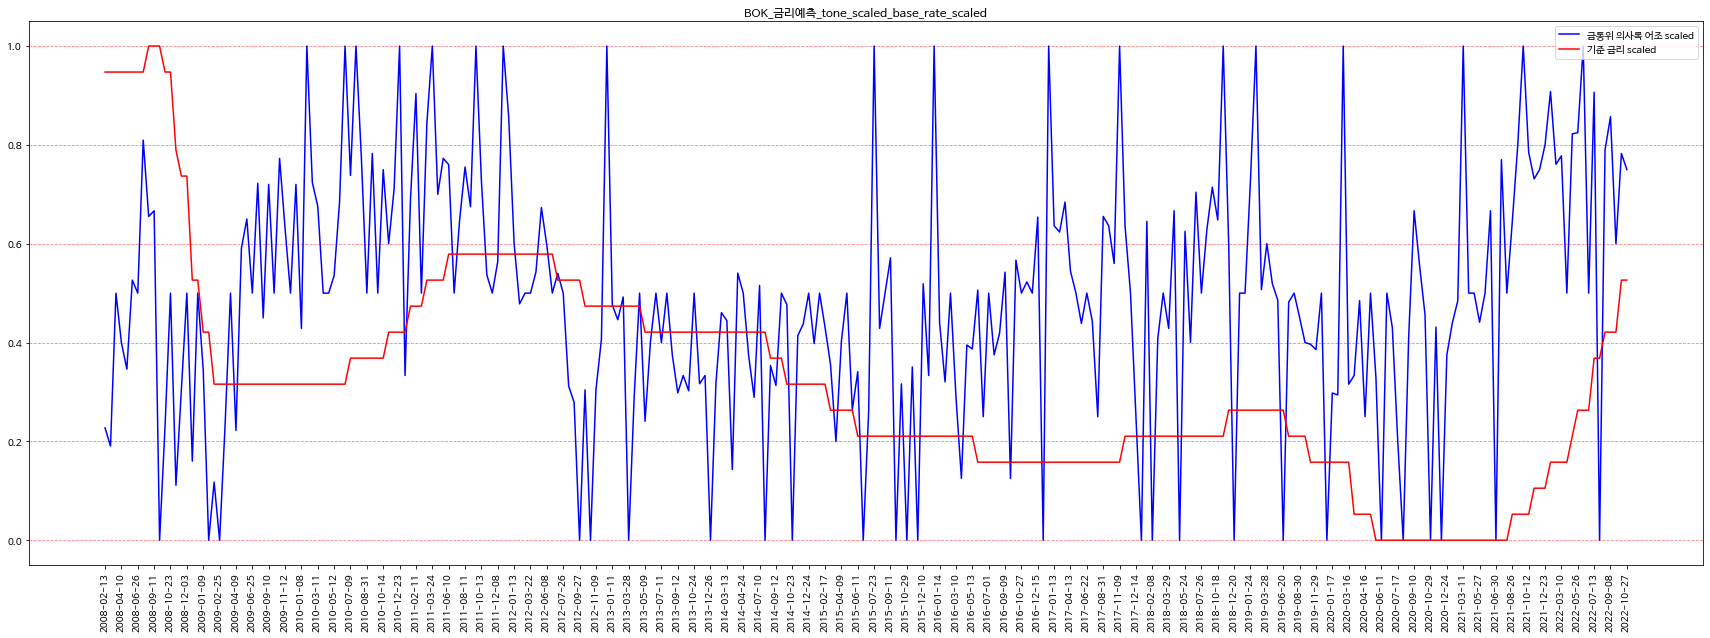

In [ ]:
plt.figure(figsize=(30,10))
plt.title('BOK_금리예측_tone_scaled_base_rate_scaled')
plt.plot(df_min.dates, df_min.tone_scaled,color='blue',label='금통위 의사록 어조 scaled')
plt.plot(df_min.dates, df_min.base_rate_scaled,color='red', label='기준 금리 scaled')
# plt.grid(True, axis='y', color='red', alpha=0.5, linestyle='--')
plt.grid(True, axis='y', color='red', alpha=0.5, linestyle='--')
plt.xticks(df_min.index[list(range(0, 280, 3))], rotation=90)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


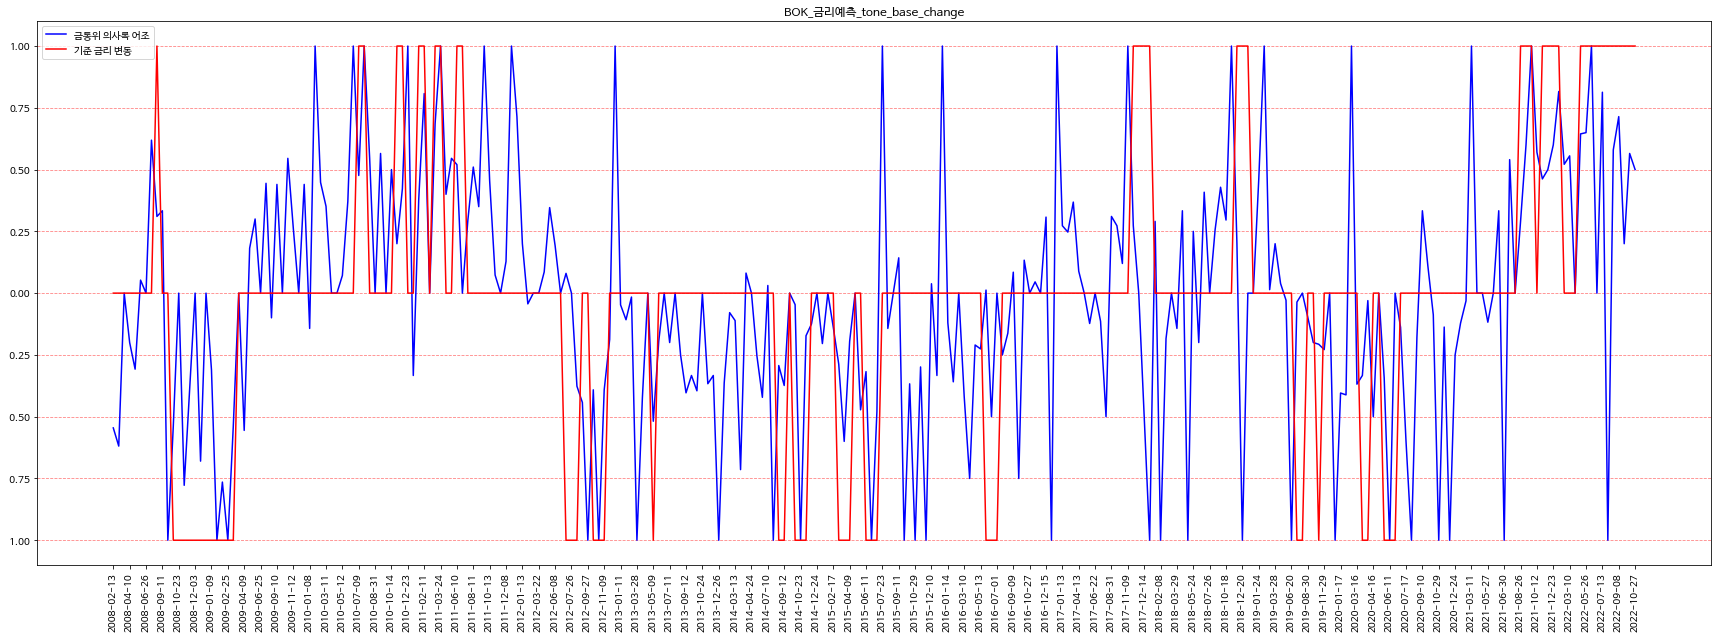

In [ ]:
plt.figure(figsize=(30,10))
plt.title('BOK_금리예측_tone_base_change')
plt.plot(df_min.dates, df_min.tone,color='blue',label='금통위 의사록 어조')
plt.plot(df_min.dates, df_min.base_change,color='red', label='기준 금리 변동')
plt.grid(True, axis='y', color='red', alpha=0.5, linestyle='--')
plt.xticks(df_min.index[list(range(0, 280, 3))], rotation=90)
plt.legend()
plt.show()

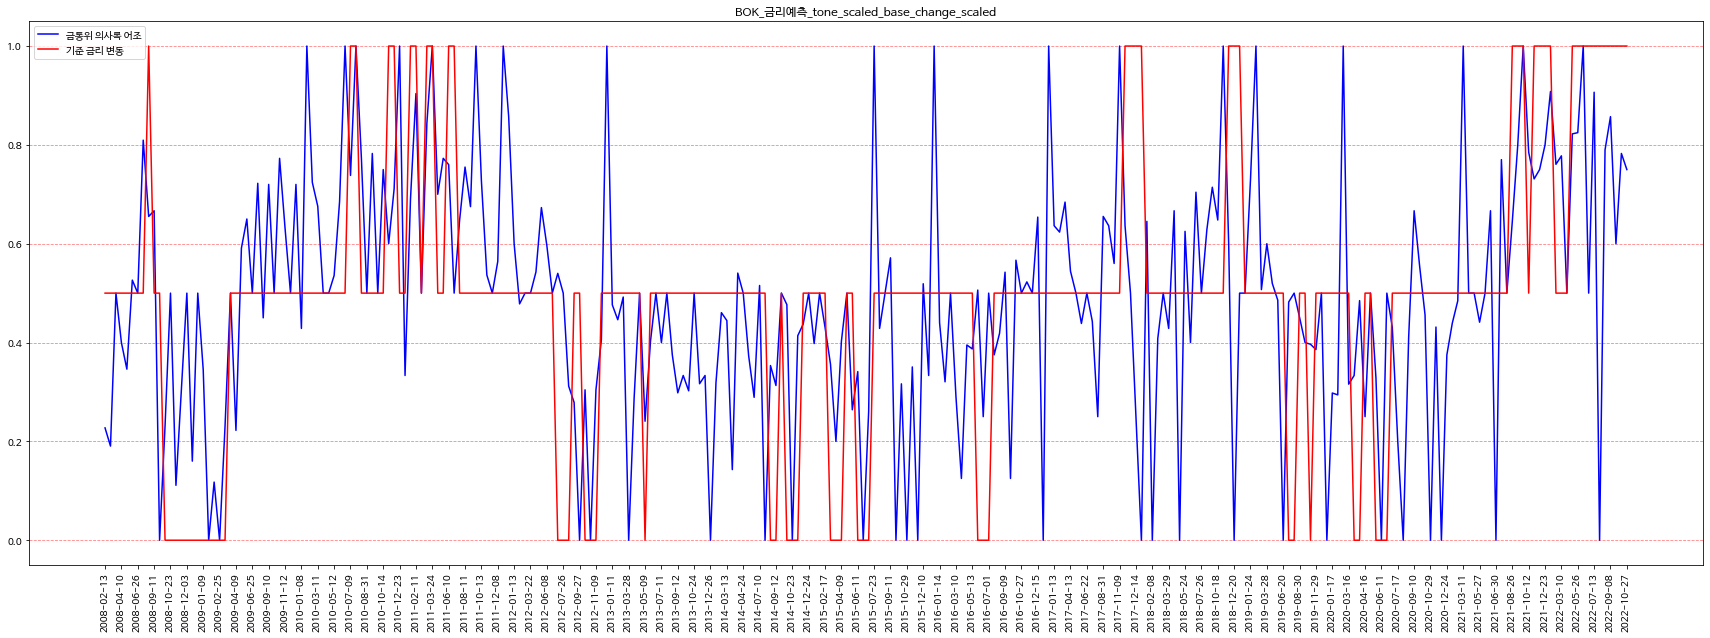

In [ ]:
plt.figure(figsize=(30,10))
plt.title('BOK_금리예측_tone_scaled_base_change_scaled')
plt.plot(df_min.dates, df_min.tone_scaled,color='blue',label='금통위 의사록 어조')
plt.plot(df_min.dates, df_min.base_change_scaled,color='red', label='기준 금리 변동')
plt.grid(True, axis='y', color='red', alpha=0.5, linestyle='--')
plt.xticks(df_min.index[list(range(0, 280, 3))], rotation=90)
plt.legend()
plt.show()